In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()


Using TensorFlow backend.


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿",
         "狗", "青蛙", "馬", "船", "卡車"]

卡車


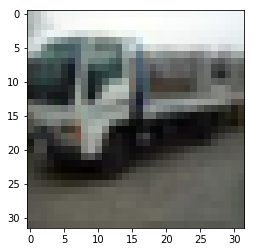

In [6]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print(trans[y_train[c][0]])
plt.imshow(x_train[c])

In [7]:
# 圖片: 處理0~1
x_train_nor = x_train / 255
x_test_nor = x_test / 255

In [8]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
cnn = Sequential()
# CNN(眼睛)
# 一個filter(27) * 32個 + bias數目(32)
cnn.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D((2, 2)))
# 288 * 64 + 64 = 18496
cnn.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D((2, 2)))
# MLP(大腦)
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [79]:
# import pydot
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(cnn).create(prog="dot", format="svg"))

In [25]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [26]:
cnn.fit(x_train_nor, y_train_cat,
        batch_size=200, epochs=10, 
        validation_split=0.1, verbose=2)


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 45s - loss: 1.5942 - acc: 0.4209 - val_loss: 1.2945 - val_acc: 0.5394
Epoch 2/10
 - 47s - loss: 1.1767 - acc: 0.5792 - val_loss: 1.0463 - val_acc: 0.6386
Epoch 3/10
 - 47s - loss: 0.9989 - acc: 0.6509 - val_loss: 0.9298 - val_acc: 0.6788
Epoch 4/10
 - 46s - loss: 0.8797 - acc: 0.6929 - val_loss: 0.8908 - val_acc: 0.6880
Epoch 5/10
 - 45s - loss: 0.7928 - acc: 0.7245 - val_loss: 0.8293 - val_acc: 0.7156
Epoch 6/10
 - 46s - loss: 0.7218 - acc: 0.7487 - val_loss: 0.8332 - val_acc: 0.7122
Epoch 7/10
 - 46s - loss: 0.6500 - acc: 0.7741 - val_loss: 0.7624 - val_acc: 0.7370
Epoch 8/10
 - 46s - loss: 0.5842 - acc: 0.7954 - val_loss: 0.7560 - val_acc: 0.7478
Epoch 9/10
 - 45s - loss: 0.5331 - acc: 0.8157 - val_loss: 0.7331 - val_acc: 0.7520
Epoch 10/10
 - 45s - loss: 0.4692 - acc: 0.8378 - val_loss: 0.7936 - val_acc: 0.7376


In [27]:
cnn.evaluate(x_test_nor, y_test_cat)

10000/10000 [==============================] - 4s 404us/step


[0.8335268852233887, 0.7287]

In [72]:
pre = cnn.predict_classes(x_test_nor)
pre

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [73]:
y_test_rs =y_test.reshape(10000)
miss_arr =pre != y_test_rs

In [74]:
import numpy as np
idx = np.nonzero(miss_arr)[0]
idx

array([  21,   24,   35, ..., 9994, 9995, 9996], dtype=int64)

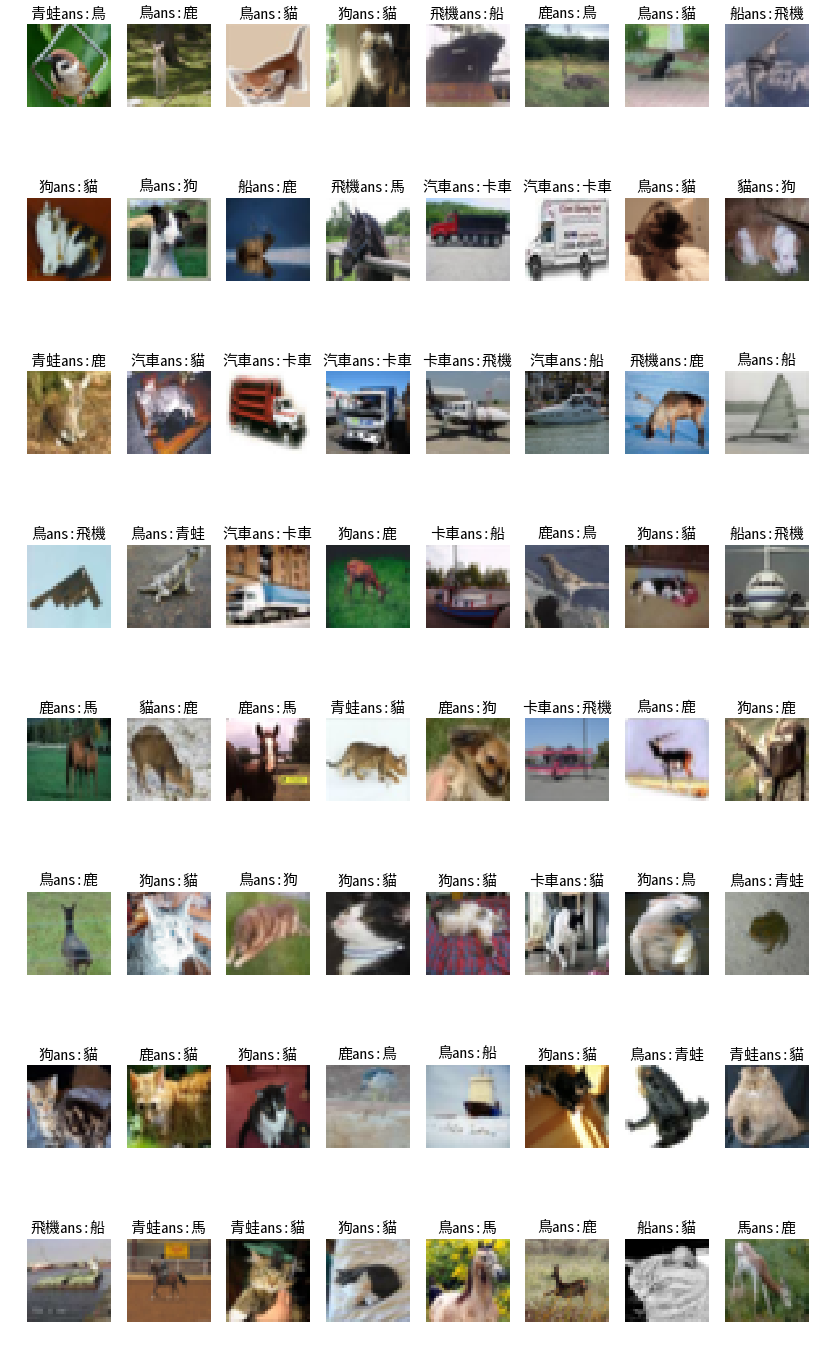

In [76]:
import matplotlib
from matplotlib.font_manager import *
import matplotlib.pyplot as plt
myfont = FontProperties(fname='E:/fonts/NotoSansMonoCJKtc-Regular.otf')
plt.figure(figsize=(14,25))
width = 8
height = 8
idx_r = random.shuffle(idx)
for w in range(64):
    img = x_test[idx[w]]
    guess = trans[pre[idx[w]]]
    ans = trans[y_test[idx[w]][0]]
    if guess==ans:
        print(idx[w])
    plt.subplot(height, width, w+1)
    t = guess + "ans:" + ans
    plt.title(t, fontproperties=myfont,size = 15)
    plt.axis("off")
    plt.imshow(img)

In [77]:
# plt.figure(figsize=(14, 25))
# width = 10
# height = 10
# false_img = x_test[idx[:100]]
# false_pre = pre[idx[:100]]
# false_ori = y_test[idx[:100]]
# for i, img in enumerate(false_img):
#     t = trans[false_pre[i]] + "ans " + trans[false_ori[i][0]]
#     plt.subplot(height, width, i + 1)
#     plt.title(t, fontproperties=myfont,size = 12)
#     plt.axis("off")
#     plt.imshow(img)

In [81]:
# save model
cnn.save("cnn_0329")

In [83]:
from keras.models import load_model
load_model = load_model("cnn_0329")
# 可以直接fit